## [CM 5] 
> -- KEVAL PRAJAPATI (20908584)

## A) Iris Dataset

#### Training the KNN classifier with k-fold cross validation 


__Observations__<br>
- The accuracy of knn classifier is best for __k = 10__ and accuracy is __93.89%__
-  Since the dataset is smaller __k-fold__ method will be more suitable because it gives the model more opportunity to train on train-test splits. However if data set is too big __K-fold__ causes problem because of number iterations it need to apply.



 Size of training set : Features =  (82, 4)  Labels =  (82,)

 Size of testing set : Features =  (21, 4)  Labels =  (21,)

 Size of validation set : Features =  (11, 4)  Labels =  (11,)

 Accuracy of Model on training dataset after 5 fold cross validation:(with K-fold)  91.39705882352942

 Accuracy of Model(with default value of k) on Validation dataset after training: (with k-fold) 100.0

 Accuracy for different values of k when testing on validation set with k-fold:

 Score for k =  1 is  91.39705882352942

 Score for k =  5 is  91.39705882352942

 Score for k =  10 is  93.89705882352942

 Score for k =  15 is  92.64705882352942

 Score for k =  20 is  90.07352941176471

 Score for k =  25 is  91.32352941176471

 Score for k =  30 is  88.82352941176471

 Score for k =  35 is  87.57352941176471

 Best accuracy:  93.89705882352942


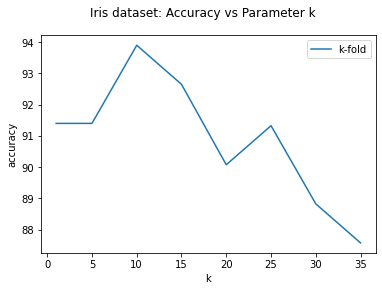

In [195]:
# AUTHOR : KEVAL PRAJAPATI
# AIM : DATA CLASSIFICATION USING WITH K-FOLD CROSS VALIDATION AND TRAIN-VALIDATE-TEST 

# Iris dataset
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,explained_variance_score


iris_df = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\iris_dataset_missing_filled2.csv')


X = iris_df.iloc[:,:-1].values  # features
y = iris_df.iloc[:,4].values   # lables

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 98) # Train - test split

print("\n Size of training set : Features = ", X_train.shape, " Labels = ", y_train.shape)
print("\n Size of testing set : Features = ", X_test.shape, " Labels = ", y_test.shape)
print("\n Size of validation set : Features = ", X_val.shape, " Labels = ", y_val.shape)

# Training kNN model on the training dataset with k-fold


knn = KNeighborsClassifier()
k5 = KFold(n_splits=5, shuffle=False)
accuracy = []
for train_index, test_index in k5.split(X_train, y_train):
    X_train_f, X_test_f, y_train_f, y_test_f = X[train_index], X[test_index], y[train_index], y[test_index]
    knn.fit(X_train_f, y_train_f)
    y_pred = knn.predict(X_test_f)
    accuracy.append(accuracy_score(y_test_f, y_pred)*100)

print("\n Accuracy of Model on training dataset after 5 fold cross validation:(with K-fold) ", np.mean(accuracy))

# Testing on validation set

y_pred_v = knn.predict(X_val)
accuracy_v = accuracy_score(y_val, y_pred_v)*100
print("\n Accuracy of Model(with default value of k) on Validation dataset after training: (with k-fold)", accuracy_v )

# Comparing the model for the various values of k

k = [1, 5, 10, 15, 20, 25, 30, 35]
k_acc_sc = []
accuracyi = []
var = []
k_var = []
for i in k:
    knn = KNeighborsClassifier(i)
    k5 = KFold(n_splits=5, shuffle=False)
    accuracy = []
    for train_index, test_index in k5.split(X_train, y_train):
        X_train_f, X_test_f, y_train_f, y_test_f = X[train_index], X[test_index], y[train_index], y[test_index]
        knn.fit(X_train_f, y_train_f)
        y_pred = knn.predict(X_test_f)
        accuracy.append(accuracy_score(y_test_f, y_pred)*100)
    k_acc_sc.append(np.mean(accuracy))
 

print('\n Accuracy for different values of k when testing on validation set with k-fold:')
j=0;
for i in k:
    print("\n Score for k = ",i,"is ", k_acc_sc[j])
    j=j+1

plt.figure()
plt.suptitle('Iris dataset: Accuracy vs Parameter k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k, k_acc_sc, label = 'k-fold')
plt.legend()

print("\n Best accuracy: ", max(k_acc_sc))

## B) Heart Disease Dataset 

#### Training the KNN classifier with train-validation-test split

__Observations__
- The accuracy of knn classifier is best for __k = 5__ and the accuracy is __81.25%__
- 


 Size of training set : Features =  (156, 13)  Labels =  (156,)

 Size of testing set : Features =  (40, 13)  Labels =  (40,)

 Size of validation set : Features =  (16, 13)  Labels =  (16,)

 Accuracy for different values of k when testing on validation set without k-fold:

 Score for k =  1 is  81.25

 Score for k =  5 is  81.25

 Score for k =  10 is  68.75

 Score for k =  15 is  68.75

 Score for k =  20 is  75.0

 Score for k =  25 is  75.0

 Score for k =  30 is  75.0

 Score for k =  35 is  75.0
Best accuracy:  81.25


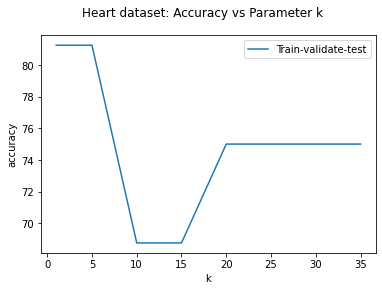

In [188]:
# Heart disease dataset
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#Using min-max normalized dataset
hd_df = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing_filled_min_max_final.csv')


# Splitting the data set into features and lables
X = hd_df.iloc[:,:-1].values  # features
y = hd_df.iloc[:,13].values   # lables

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 98) # Train test split
X_train_f, X_val, y_train_f, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=98) # Train validation split

print("\n Size of training set : Features = ", X_train.shape, " Labels = ", y_train.shape)
print("\n Size of testing set : Features = ", X_test.shape, " Labels = ", y_test.shape)
print("\n Size of validation set : Features = ", X_val.shape, " Labels = ", y_val.shape)

# Training the model without k-fold 
k_nk = [1, 5, 10, 15, 20, 25, 30, 35]
accuracy_nk = []
k_acc_sc_nk = []
for i in k_nk:
    knn_nk = KNeighborsClassifier(i)
    knn_nk.fit(X_train_f,y_train_f)
    y_pred_v_nk = knn_nk.predict(X_val)
    k_acc_sc_nk.append(accuracy_score(y_val,y_pred_v_nk)*100)

print('\n Accuracy for different values of k when testing on validation set without k-fold:')
j=0;
for i in k_nk:
    print("\n Score for k = ",i,"is ", k_acc_sc_nk[j])
    j=j+1   


plt.figure()
plt.suptitle('Heart dataset: Accuracy vs Parameter k')
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.plot(k, k_acc_sc, label = 'k_fold')
plt.plot(k, k_acc_sc_nk, label = 'Train-validate-test')
plt.legend()

print("Best accuracy: ", max(k_acc_sc_nk))
